In [21]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

### Dataset

In [3]:
iris = datasets.load_iris()

In [17]:
X = iris.data

In [18]:
y = iris.target

In [7]:
column_names = iris.feature_names
column_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(data=np.c_[X, y], columns=column_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Scatter plot

Text(0, 0.5, 'sepal width (cm)')

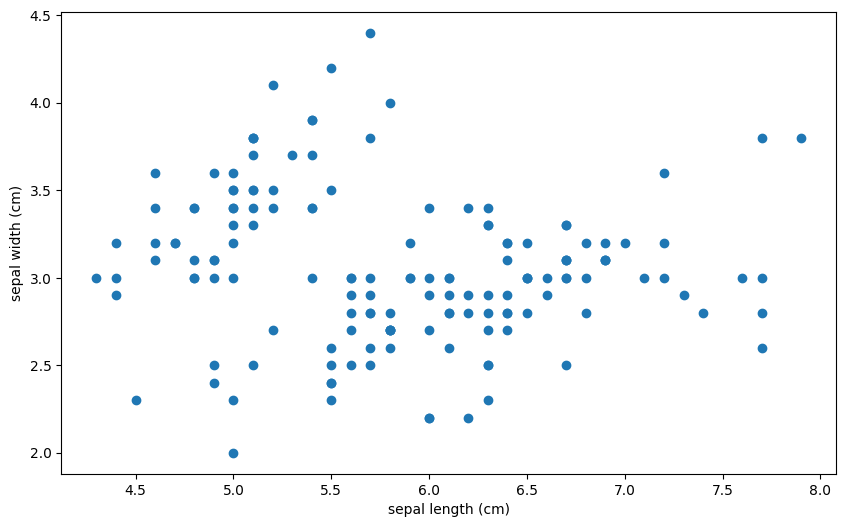

In [10]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'sepal width (cm)')

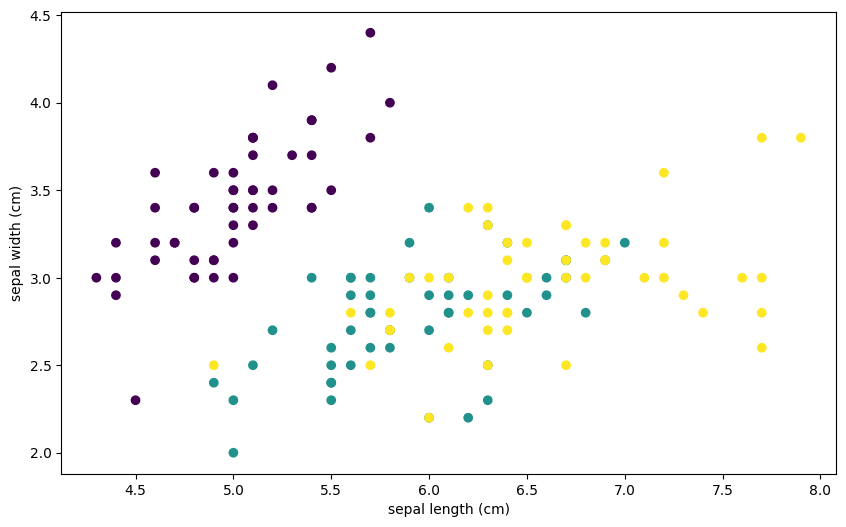

In [25]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'],
            c=df['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [11]:
import seaborn as sns

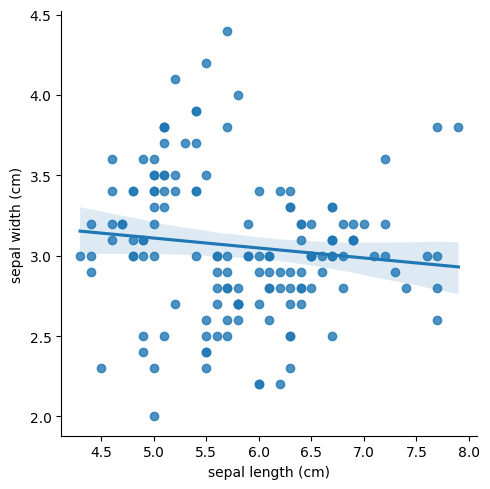

In [12]:
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=df)

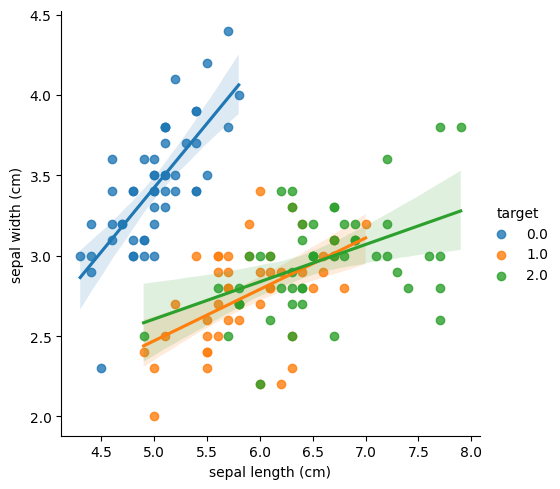

In [30]:
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=df, hue='target')

### Histogram

In [31]:
np.random.seed(42)
X = np.random.normal(size=1000)
X

array([ 4.96714153e-01, -1.38264301e-01,  6.47688538e-01,  1.52302986e+00,
       -2.34153375e-01, -2.34136957e-01,  1.57921282e+00,  7.67434729e-01,
       -4.69474386e-01,  5.42560044e-01, -4.63417693e-01, -4.65729754e-01,
        2.41962272e-01, -1.91328024e+00, -1.72491783e+00, -5.62287529e-01,
       -1.01283112e+00,  3.14247333e-01, -9.08024076e-01, -1.41230370e+00,
        1.46564877e+00, -2.25776300e-01,  6.75282047e-02, -1.42474819e+00,
       -5.44382725e-01,  1.10922590e-01, -1.15099358e+00,  3.75698018e-01,
       -6.00638690e-01, -2.91693750e-01, -6.01706612e-01,  1.85227818e+00,
       -1.34972247e-02, -1.05771093e+00,  8.22544912e-01, -1.22084365e+00,
        2.08863595e-01, -1.95967012e+00, -1.32818605e+00,  1.96861236e-01,
        7.38466580e-01,  1.71368281e-01, -1.15648282e-01, -3.01103696e-01,
       -1.47852199e+00, -7.19844208e-01, -4.60638771e-01,  1.05712223e+00,
        3.43618290e-01, -1.76304016e+00,  3.24083969e-01, -3.85082280e-01,
       -6.76922000e-01,  

(array([  4.,  22.,  96., 228., 272., 226., 104.,  38.,   9.,   1.]),
 array([-3.24126734, -2.53186746, -1.82246757, -1.11306769, -0.40366781,
         0.30573208,  1.01513196,  1.72453184,  2.43393172,  3.14333161,
         3.85273149]),
 <BarContainer object of 10 artists>)

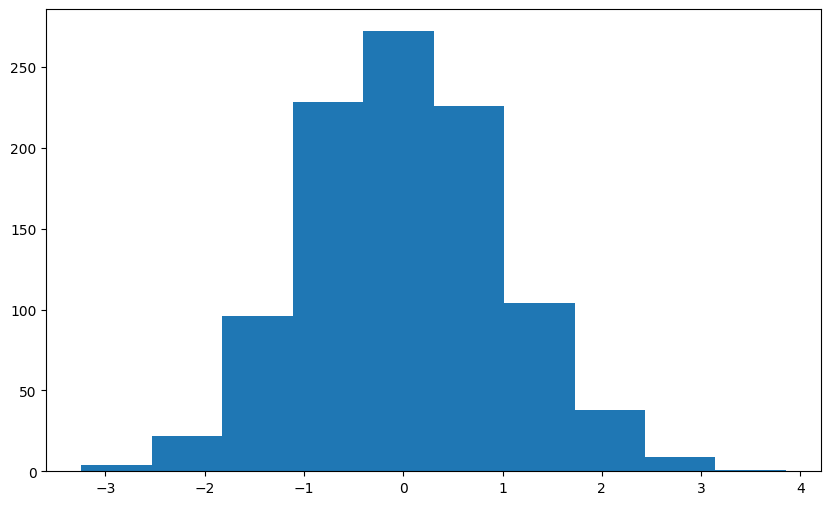

In [37]:
plt.hist(X)

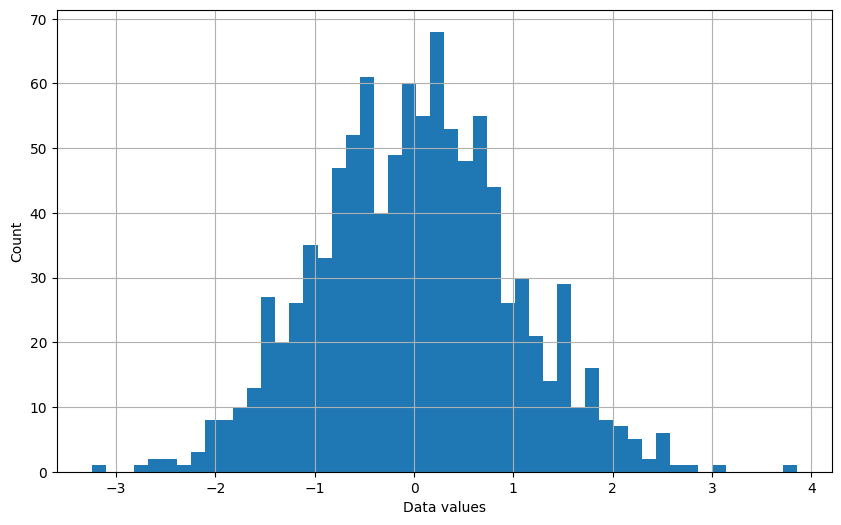

In [39]:
plt.hist(X, bins=50)
plt.xlabel('Data values')
plt.ylabel('Count')
plt.grid()

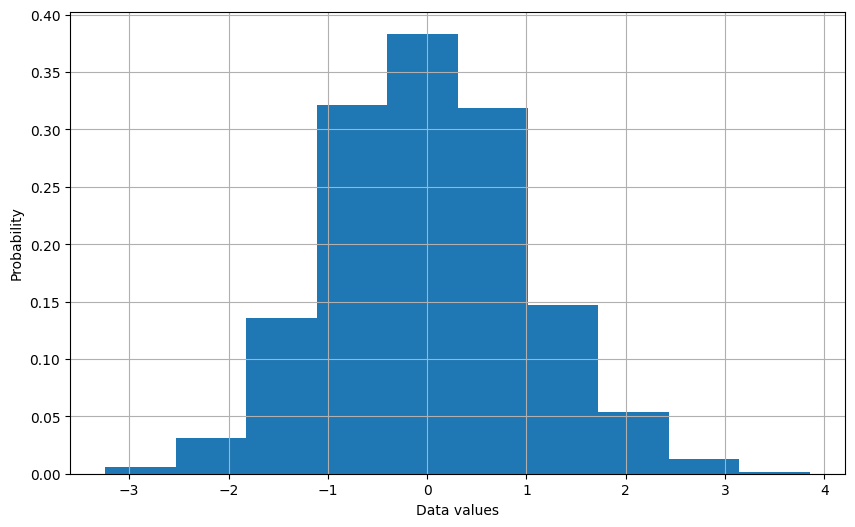

In [40]:
plt.hist(X, density=True)
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.grid()

#### Determining Bin size

In [48]:
# Bin Width = 2 * IQR / (cube root of n)
q1, q3 = np.percentile(X, [25, 75])
iqr = q3 - q1
n = len(X)

bin_width = 2*iqr / (n**(1/3))
bins = round((X.max() - X.min())/bin_width)
bins

27

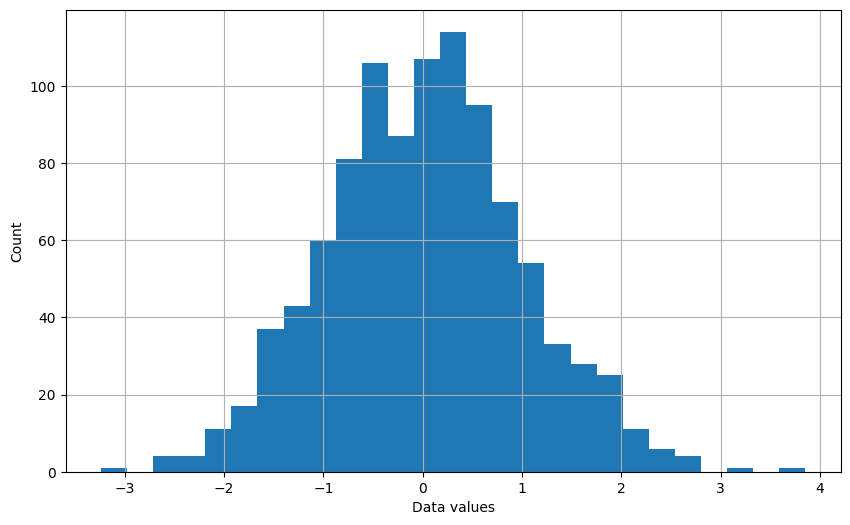

In [49]:
plt.hist(X, bins=bins)
plt.xlabel('Data values')
plt.ylabel('Count')
plt.grid()

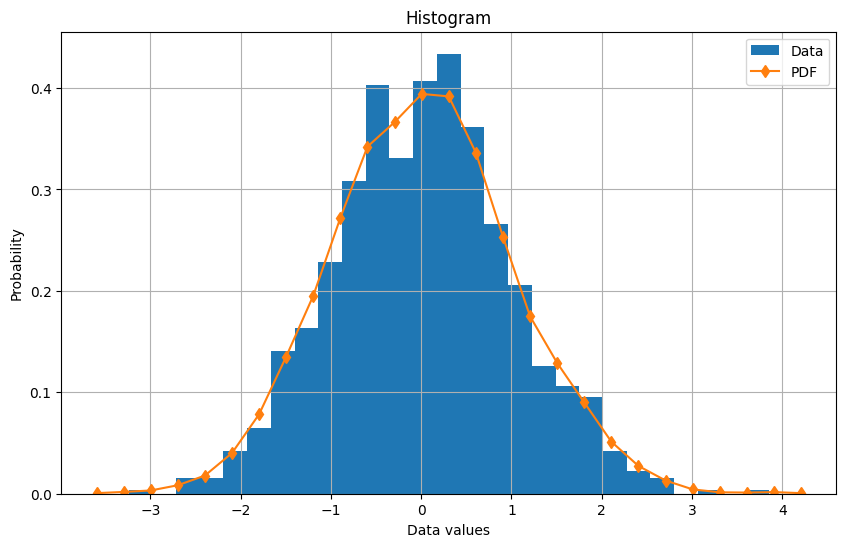

In [78]:
import scipy.stats as st

plt.hist(X, density=True, bins=bins, label='Data')
mn, mx = plt.xlim()
kde_xs = np.linspace(mn, mx, bins)
kde = st.gaussian_kde(X)
kde_ys = kde.pdf(kde_xs)
plt.plot(kde_xs, kde_ys, label='PDF', marker='d')
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.legend()
plt.title('Histogram')
plt.grid()


/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_60684/129081890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X)


<AxesSubplot: ylabel='Density'>

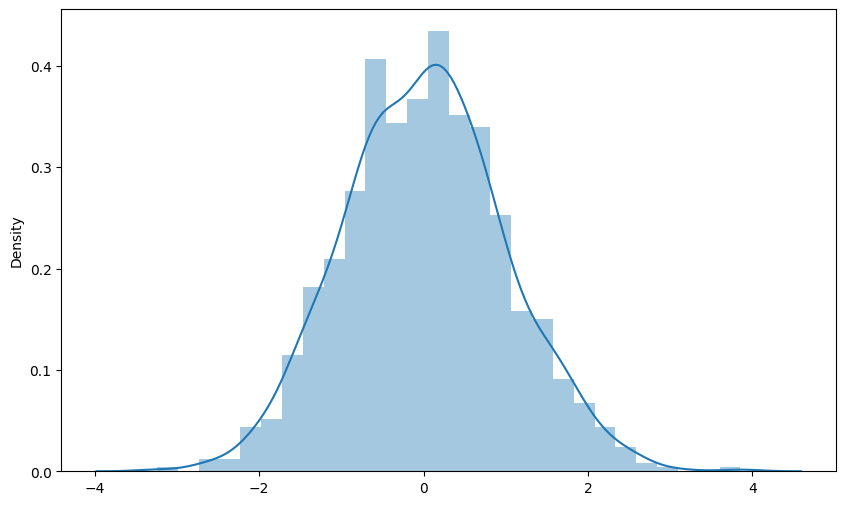

In [64]:
sns.distplot(X)

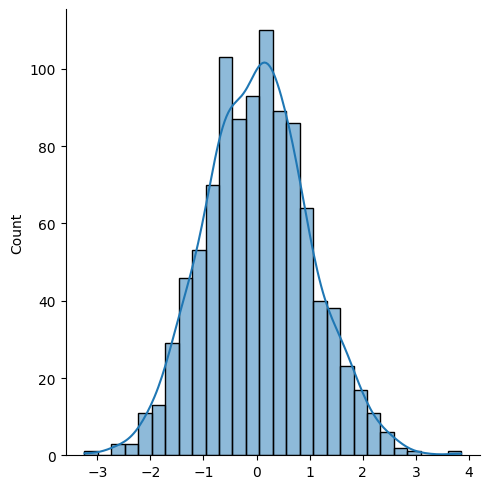

In [67]:
sns.displot(X, kde=True)

### Boxplot

In [73]:
data = df['sepal length (cm)'].values
data[0] = 0
data[-1] = 10
type(data), data

(numpy.ndarray,
 array([ 0. ,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
         4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
         4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
         5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
         5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
         5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
         5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
         6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
         5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
         5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
         6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
         5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
         6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
         6.8,  6.7,  6

{'whiskers': [<matplotlib.lines.Line2D at 0x150297520>,
 'caps': [<matplotlib.lines.Line2D at 0x150297a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x150297280>],
 'medians': [<matplotlib.lines.Line2D at 0x1502a4040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1502a42e0>],
 'means': []}

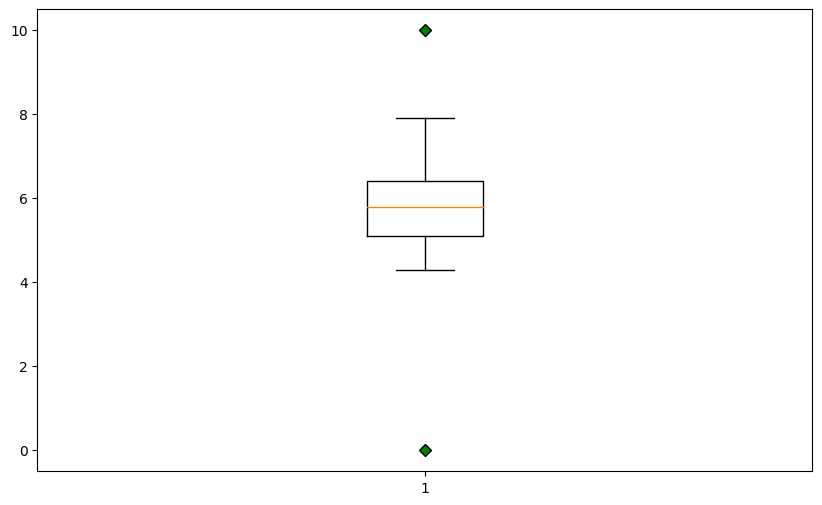

In [76]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(data, flierprops=green_diamond)